# Black-Scholes Model Simulation Demo

This notebook illustrates how to use a custom `BS` class to simulate asset price trajectories under the Black-Scholes model.

We consider:
- A one-dimensional (single asset) case
- A two-dimensional (multi-asset) case with correlation between assets

In [2]:
import sys
from pathlib import Path

# Add the path to import the custom Heston model
sys.path.append(str(Path().resolve().parents[0] / "src"))

import numpy as np
import matplotlib.pyplot as plt
from models.BS import BS  # Assuming your BS class is in models/BS.py


## One-dimensional Black-Scholes model

We simulate the evolution of a single asset under the Black-Scholes model, defined by the following SDE:

$$
dS_t = r S_t \, dt + \sigma S_t \, dW_t,
$$

where:
- $ S_t $ is the asset price at time $ t $,
- $ r $ is the risk-free interest rate,
- $ \sigma $ is the volatility,
- $ W_t $ is a standard Brownian motion.

We simulate $ n = 10 $ paths over a time horizon of 1 year with 100 time steps.


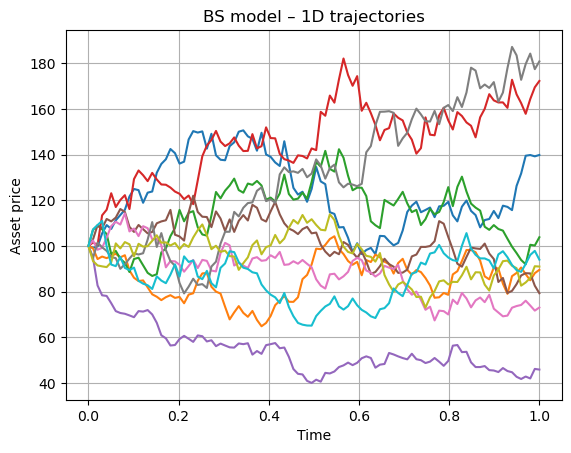

In [6]:
# Create the BS model
bs = BS(r=0.03, sigma=0.4)

# Generate 10 trajectories
S = bs.generate_trajectories(S0=100, T=1, N=100, n_paths=10)

# Plot the paths
for i in range(10):
    plt.plot(np.linspace(0,1,100),S[:, i])
plt.title("BS model – 1D trajectories")
plt.xlabel("Time")
plt.ylabel("Asset price")
plt.grid(True)
plt.show()


## Multidimensional Black-Scholes model

We consider a $d$-dimensional Black-Scholes model. The price process $S_t \in \mathbb{R}^d$ follows:

$$
dS_t = \operatorname{diag}(S_t) \left( r \, \mathbf{1} \, dt + \sigma \odot dW_t \right),
$$

where:
- $r \in \mathbb{R}$ is the constant interest rate,
- $\mathbf{1} \in \mathbb{R}^d$ is a vector of ones,
- $\sigma \in \mathbb{R}^d$ is the vector of volatilities,
- $W_t \in \mathbb{R}^d$ is a $d$-dimensional Brownian motion,
- $\Sigma = \mathbb{E}[dW_t dW_t^\top]/dt$ is the correlation matrix,
- $\odot$ denotes element-wise (Hadamard) product.

This gives $d$ correlated geometric Brownian motions with individual volatilities and correlations encoded in $\Sigma$.


In [7]:
rho = 0.6
bs2 = BS(
    r=0.03,
    sigma=np.array([0.3, 0.5]),
    rho=np.array([
        [1.00, rho],
        [rho, 1.00]
    ])
)

# Simulate 2D asset prices
n_paths = 10
N = 100
S2 = bs2.generate_trajectories(S0=np.array([100, 80]), T=1, N=N, n_paths=n_paths)


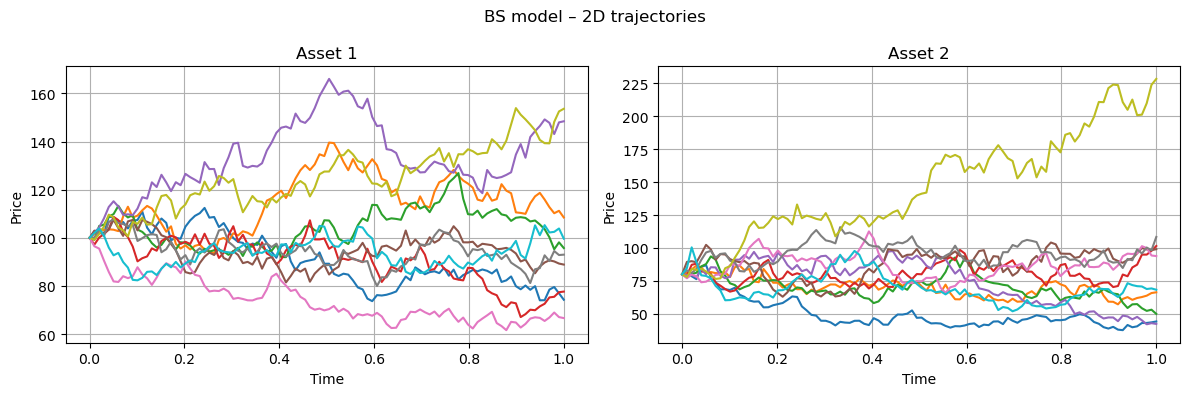

In [8]:
# Plot asset 1 and asset 2 trajectories
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for i in range(n_paths):
    axs[0].plot(np.linspace(0, 1, N), S2[:, i, 0])
    axs[1].plot(np.linspace(0, 1, N), S2[:, i, 1])

axs[0].set_title("Asset 1")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Price")

axs[1].set_title("Asset 2")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Price")

for ax in axs:
    ax.grid(True)

plt.suptitle("BS model – 2D trajectories")
plt.tight_layout()
plt.show()
